ML models : 

1. Decsision Tree Regressor
2. Linear Regression


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, log_loss
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns


dataframe = pd.read_csv("C:/Users/Rohan Mahesh Rao/Desktop/DIP_project/Specklefilter_Data_actual.csv")
dataframe.head()

,image_name,hueval,satval,valval,kernel_size
0,noise1.png,5,4,4,4
1,noise2.png,5,6,4,5
2,noise3.png,5,8,6,5
3,noise4.png,5,5,5,5
4,noise5.png,5,5,7,6


In [10]:
dataframe = dataframe.sample(frac = 1) # to shuffle the dataset 

In [11]:
y = dataframe['kernel_size']

In [12]:
feature_names = ['hueval','satval','valval']
x = dataframe[feature_names]
x.head()


,hueval,satval,valval
411,3,5,3
86,5,5,3
5,5,7,4
40,5,8,6
33,5,7,5


In [13]:
x = np.asarray(x).astype('float32')
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.01, shuffle=True)

In [14]:
model1 = DecisionTreeRegressor(random_state = 1);
#training
model1.fit(x_train, y_train)
pred1 = model1.predict(x_test)


def get_kernel(x_given):
    return model1.predict(x_given)

In [15]:
hsv_inputs = open("hsv_inputs.txt","r")
x_inp = str(hsv_inputs.read())
x_given = []

for i in range (0,3):
    x_given.append(int(x_inp[i]))

print(x_given)

pred = get_kernel([x_given])
print("Predicted kernel size :",round(pred[0]))
mse_val = mse(y_test, pred1)
print("MSE: ",mse_val)

[5, 6, 6]
Predicted kernel size : 5
MSE:  0.7265424044473776


In [16]:

pred_file = open("predicted_kernel.txt","w")
pred_file.write(str(round(pred[0])))
pred_file.close() #to change file access modes

Metrics


MSE :  0.7265424044473776
RMSE :  0.8523745681608395
MAE :  0.8344481605351172
R2 :  -0.24550126476693301




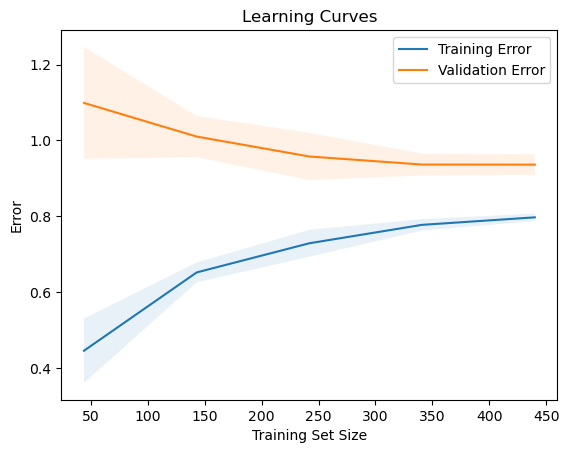

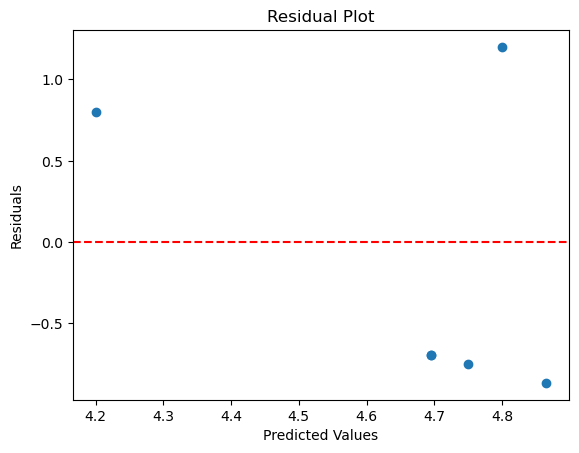

In [18]:
# Numeric Metrics
mse = mean_squared_error(y_test, pred1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred1)
r2 = r2_score(y_test, pred1)

print("MSE : ",mse)
print("RMSE : ",rmse)
print("MAE : ",mae)
print("R2 : ",r2)
print("\n")

# Confusion Matrix (not applicable for regression)
# Uncomment the code below if you want to visualize a confusion matrix for regression
# cm = confusion_matrix(y_test, pred1.round())

# Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(DecisionTreeRegressor(), x, y, cv=5, scoring='neg_mean_squared_error')
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training Error')
plt.plot(train_sizes, valid_mean, label='Validation Error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Error')
plt.legend()
plt.show()

# Residual Plots
residuals = y_test - pred1
plt.scatter(pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()